In [ ]:
def show_img(imagen_np, title=""):
    plt.imshow(imagen_np, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

#Espacios de color

In [ ]:
import numpy as np

import cv2

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

##Conversoones del espacio de color

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags [30:50]   #algunas

['COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_GRBG2BGR',
 'COLOR_BAYER_GRBG2BGRA',
 'COLOR_BAYER_GRBG2BGR_EA',
 'COLOR_BAYER_GRBG2BGR_VNG',
 'COLOR_BAYER_GRBG2GRAY']

##Nemo

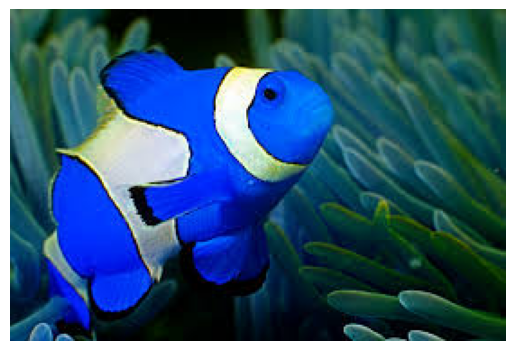

In [ ]:
nemo = cv2.imread('nemo0.jpg')
show_img (nemo)

Por defecto openCV lee la imagen en formato BGR, por lo tanto debemos indicarle que queremos ver la imagen en formato RGB

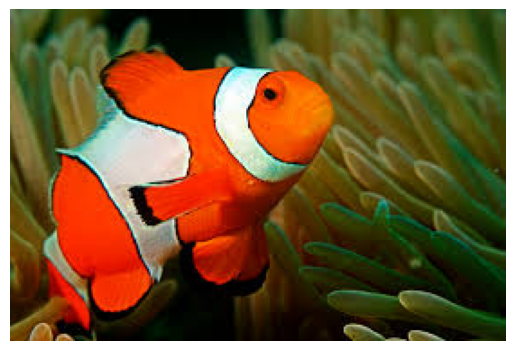

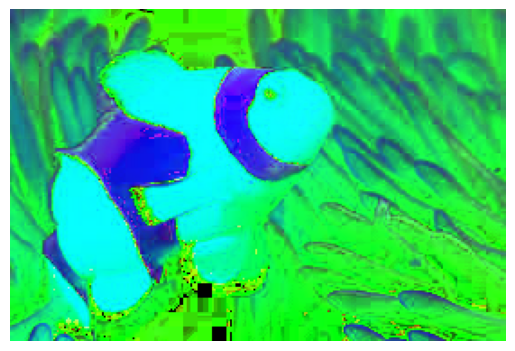

In [ ]:
rgb_nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
show_img (rgb_nemo)

hsv_nemo = cv2.cvtColor(rgb_nemo, cv2.COLOR_RGB2HSV)
show_img (hsv_nemo)

In [ ]:
def plot_color_space(image, color_space):
    if color_space == "RGB":
        r, g, b = cv2.split(image)
        labels = ["Red", "Green", "Blue"]
        pixel_colors = image.reshape((-1, 3))
        norm = colors.Normalize(vmin=0, vmax=255)
    elif color_space == "HSV":
        h, s, v = cv2.split(image)
        labels = ["Hue", "Saturation", "Value"]
        pixel_colors = cv2.cvtColor(image, cv2.COLOR_HSV2RGB).reshape((-1, 3))
        norm = colors.Normalize(vmin=0, vmax=255)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(*[c.flatten() for c in (r, g, b)] if color_space == "RGB" else (h.flatten(), s.flatten(), v.flatten()),
                 facecolors=pixel_colors, marker=".")

    axis.set_xlabel(labels[0])
    axis.set_ylabel(labels[1])
    axis.set_zlabel(labels[2])
    plt.show()

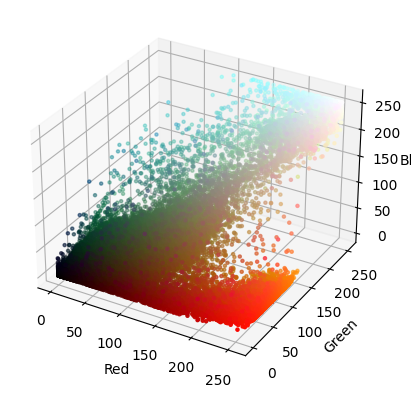

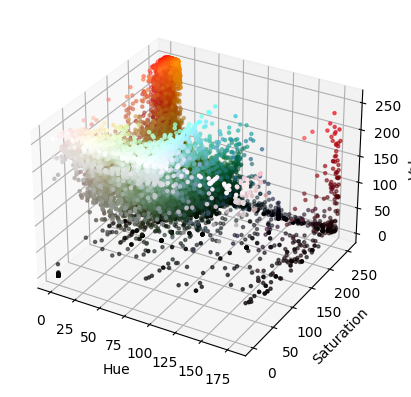

In [ ]:
plot_color_space(rgb_nemo, "RGB")
plot_color_space(hsv_nemo, "HSV")

Por lo tanto podemos concluir que el espacio de color HSV ofrece ventajas significativas para la segmentación de imágenes, debido a su representación cilíndrica de los colores. En el espacio HSV, los colores están más agrupados y separables visualmente, lo que facilita la identificación y segmentación de los colores de Nemo, ya que se encuentran en una región específica del espacio de color. Además, la capacidad de ajustar la saturación y el valor de forma independiente en HSV es útil para mejorar la detección y segmentación de los tonos de naranja en la imagen de Nemo.

Por lo tanto se concluye que el espacio de color HSV permite una segmentación más precisa y controlada de los colores, lo que facilita la detección y el aislamiento de objetos o regiones de interés en la imagen.

Ahora que el color de Nemos es más separable del fondo, se le aplicará un threshold para aislarlo del fondo:

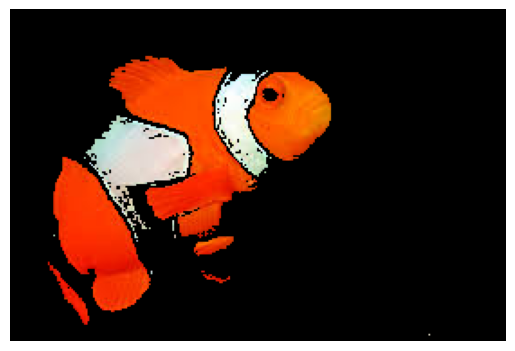

In [ ]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_orange = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result_orange = cv2.bitwise_and(rgb_nemo, rgb_nemo, mask=mask_orange)
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(rgb_nemo, rgb_nemo, mask=mask_white)

final_mask = mask_orange + mask_white
final_result = cv2.bitwise_and(rgb_nemo, rgb_nemo, mask=final_mask)
#final_result_blur = cv2.GaussianBlur(final_result, (3, 3), 0)
show_img (final_result)

## Pajaro

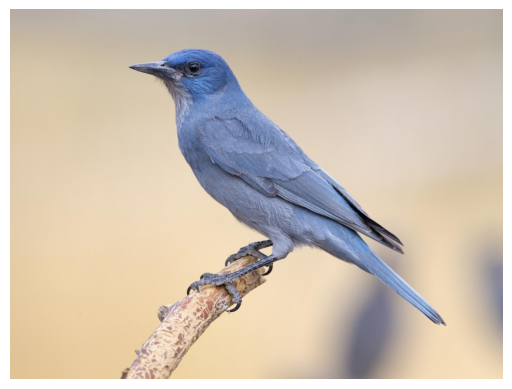

In [ ]:
bird = cv2.imread('bird.jpg')
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)
show_img (bird)

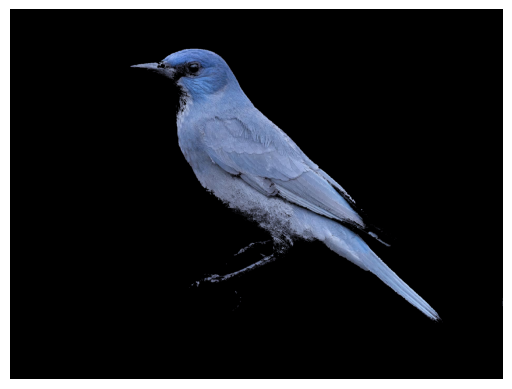

In [ ]:
light_blue = (80, 50, 50)
dark_blue = (130, 255, 255)

hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

mask_blue = cv2.inRange(hsv_bird, light_blue, dark_blue)
result_blue = cv2.bitwise_and(bird, bird, mask=mask_blue)

show_img(result_blue)

## Rosa

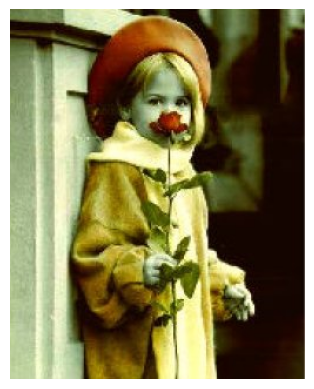

In [ ]:
rose = cv2.imread('Girl_and_rose.jpg')
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)
show_img (rose)

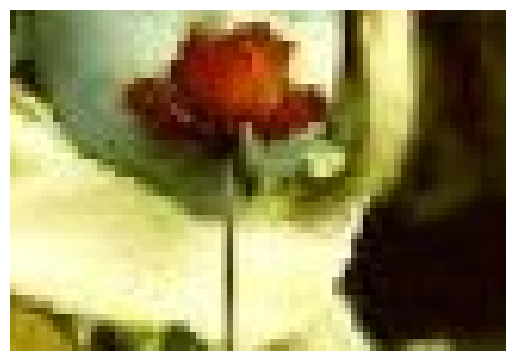

In [ ]:
cut_rose = rose[90:140, 100:180]
show_img(cut_rose)

Se recortó la imagen, ya que, sino se confundía con el sombrero

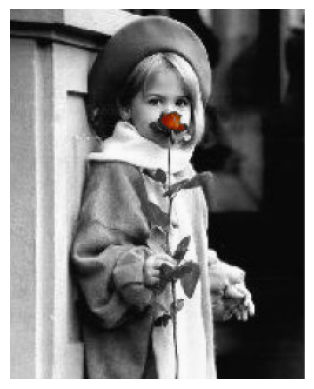

In [ ]:
hsv_rose = cv2.cvtColor(cut_rose, cv2.COLOR_RGB2HSV)

light_red = (0, 200, 100)
dark_red = (15, 255, 200)

mask_red = cv2.inRange(hsv_rose, light_red, dark_red)

gray_background = cv2.cvtColor(cut_rose, cv2.COLOR_RGB2GRAY)

#Máscara inversa
gray_background_masked = cv2.bitwise_and(gray_background, gray_background, mask=~mask_red)

result_red = cv2.bitwise_and(cut_rose, cut_rose, mask=mask_red)

result = cv2.add(result_red, cv2.cvtColor(gray_background_masked, cv2.COLOR_GRAY2RGB))

rose_bw= cv2.cvtColor(rose, cv2.COLOR_RGB2GRAY)
rose_color = cv2.cvtColor(rose_bw, cv2.COLOR_GRAY2RGB)

rose_color[85:140, 100:180] = result

show_img(rose_color)

## K-Means

El algoritmo K-Means es una técnica de clustering que se utiliza comúnmente para segmentar una imagen basándose en la similitud de los colores de los píxeles. El objetivo es agrupar píxeles de colores similares en clústeres (segmentos) para simplificar la representación de la imagen y, posiblemente, realizar análisis adicionales. La paleta de colores de la imagen resultante suele elegirse como el color centrar del cluster una vez realizada la división.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


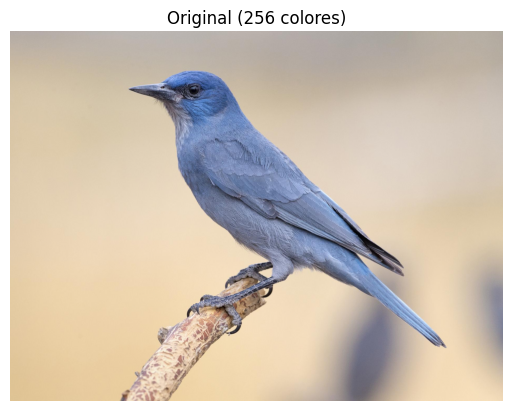

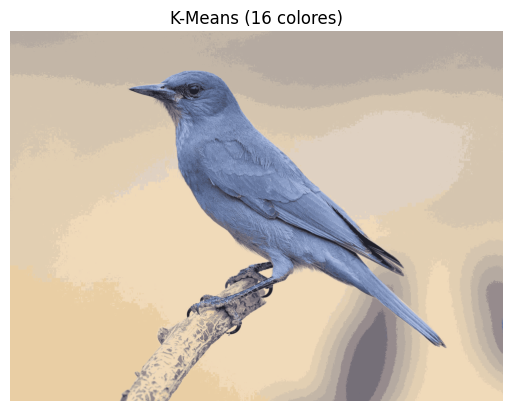

In [86]:
N_COLORS = 16

# Cargamos la imagen
bird = cv2.cvtColor(cv2.imread('bird.jpg'), cv2.COLOR_BGR2RGB)
bird = np.array(bird, dtype=np.float64) / 255.0

# Redimensionamos
w, h, d = tuple(bird.shape)
image_array = np.reshape(bird, (w * h, d))

# Fitteo con una muestra aleatoria de pixeles
image_array_sample = shuffle(image_array, random_state=0)[:10000]

# Fitteo y establezco a que cluster pertenece cada pixel
kmeans = KMeans(n_clusters=N_COLORS, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

# Clusterizacion de la imagen original en funcion de los colores
# centrales de cada cluster
clusterized = (kmeans.cluster_centers_)[labels].reshape(bird.shape)

show_img(bird, 'Original (256 colores)')
show_img(clusterized, 'K-Means (16 colores)')


# Procesamiento de Color

## Filtro de Bayer


El filtro de Bayer es una **disposición de filtros de colores** en una matriz regular. Se utiliza comúnmente en la captura de imágenes en cámaras digitales y sensores de imagen para **capturar información de color a partir de la información monocromática proporcionada por un sensor de imagen**.

La matriz de Bayer se compone de pequeños filtros de color rojo, verde y azul que se superponen en cada píxel del sensor de imagen. La disposición más común es la matriz Bayer 2x2, donde cada fila y columna contiene filtros R (rojo), G (verde) y B (azul) dispuestos de la siguiente forma:

\begin{bmatrix}
R & G \\
G & B
\end{bmatrix}

El ojo humano es más sensible a las diferencias de luminosidad en el verde es por ello que se encuentran más sensores de este color. Por lo tanto, al utilizar más píxeles verdes en comparación con los rojos y azules, se mejora la percepción visual y se mantiene una alta resolución de luminosidad. Este diseño permite capturar información de color al combinar los valores de los píxeles vecinos con diferentes filtros de color.

## Demosaicing

El demosaicing es el proceso de reconstruir una imagen en color a partir de la información de color incompleta capturada por un sensor de imagen que utiliza un filtro de Bayer o una matriz similar. El filtro de Bayer, que se encuentra comúnmente en sensores de cámaras digitales, registra información sobre el color en una matriz regular de píxeles que tienen filtros rojos, verdes y azules intercalados.

El demosaicing es un proceso crítico en la fotografía digital, ya que **permite reconstruir imagenes a color de alta calidad a partir de sensores monocromáticos con filtros de Bayer**. Hay varias técnicas de demosaicing, y el enfoque exacto puede variar, pero en general, implica interpolar y combinar los valores de los píxeles vecinos de diferentes colores para estimar los valores de los canales de color que faltan.

## Implementacion

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [32]:
def wbscalematrix(m, n, wb_scales, align):
    # Makes a white-balance scaling matrix for an image of size m-by-n
    # from the individual RGB white balance scalar multipliers [wb_scales] = [R_scale G_scale B_scale].

    scalematrix = wb_scales[1] * np.ones((m,n)) # Initialize to all green values

    # Fill in the scales for the red and blue pixels across the matrix
    if (align == 'rggb'):
        scalematrix[1::2, 1::2] = wb_scales[2] # b
        scalematrix[0::2, 0::2] = wb_scales[0] # r

    elif (align == 'bggr'):
        scalematrix[1::2, 1::2] = wb_scales[0] # r
        scalematrix[0::2, 0::2] = wb_scales[2] # b
    elif (align == 'grbg'):
        scalematrix[0::2, 1::2] = wb_scales[0] # r
        scalematrix[0::2, 1::2] = wb_scales[2] # b
    elif (align == 'gbrg'):
        scalematrix[1::2, 0::2] = wb_scales[0] # r
        scalematrix[0::2, 1::2] = wb_scales[2] # b
    return scalematrix


def apply_cmatrix(img, cmatrix):
    # Applies color transformation CMATRIX to RGB input IM.
    if (img.shape[2] != 3):
        raise ValueError('Apply cmatrix to RGB image only.')

    r = cmatrix[0,0] * img[:,:,0] + cmatrix[0,1] * img[:,:,1] + cmatrix[0,2] * img[:,:,2]
    g = cmatrix[1,0] * img[:,:,0] + cmatrix[1,1] * img[:,:,1] + cmatrix[1,2] * img[:,:,2]
    b = cmatrix[2,0] * img[:,:,0] + cmatrix[2,1] * img[:,:,1] + cmatrix[2,2] * img[:,:,2]
    corrected = np.stack((r,g,b), axis=2)
    return corrected


def debayering(input):
    # Bilinear Interpolation of the missing pixels
    #
    # Assumes a Bayer CFA in the 'rggb' layout
    #   R G R G
    #   G B G B
    #   R G R G
    #   G B G B
    #
    # Input: Single-channel rggb Bayered image
    # Returns: A debayered 3-channels RGB image
    #
    img = input.astype(np.double)

    m = img.shape[0]
    n = img.shape[1]

    r = np.multiply(img, np.tile([[1,0],[0,0]], (m//2, n//2)))
    g = np.multiply(img, np.tile([[0,1],[1,0]], (m//2, n//2)))
    b = np.multiply(img, np.tile([[0,0],[0,1]], (m//2, n//2)))

    # Interpolating green:
    filter_g = 0.25 * np.array([[0,1,0],[1,0,1],[0,1,0]])
    g = g + convolve2d(g, filter_g, 'same')

    # Interpolating blue:
    filter1 = 0.25 * np.array([[1,0,1],[0,0,0],[1,0,1]])
    missing_b1 = convolve2d(b, filter1, 'same')
    filter2 = 0.25 * np.array([[0,1,0],[1,0,1],[0,1,0]])
    missing_b2 = convolve2d(b + missing_b1, filter2, 'same')
    b = b + missing_b1 + missing_b2

    # Interpolating red:
    missing_r1 = convolve2d(r, 0.25 * np.array([[1,0,1],[0,0,0],[1,0,1]]), 'same')
    missing_r2 = convolve2d(r + missing_r1, 0.25 * np.array([[0,1,0],[1,0,1],[0,1,0]]), 'same')
    r = r + missing_r1 + missing_r2

    return np.stack((r,g,b), axis=2)

In [49]:
# Step 0: Convert RAW file to TIFF
black = 0
saturation = 16383
wb_multipliers = [2.217041, 1.000000, 1.192484] # white balance multipliers

raw_data = Image.open('sample.tiff')

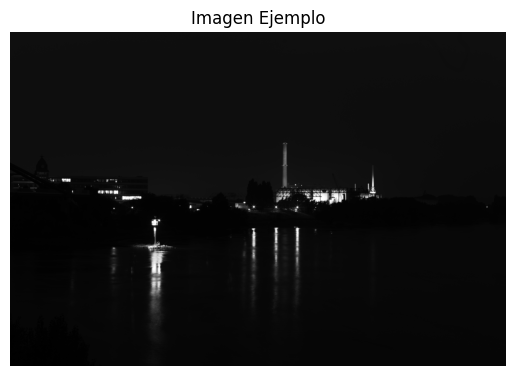

In [51]:
raw = np.array(raw_data).astype(np.double)

linear_bayer = raw / np.max(raw) # Step 1: Normalization
show_img(linear_bayer*255, "Imagen Ejemplo")

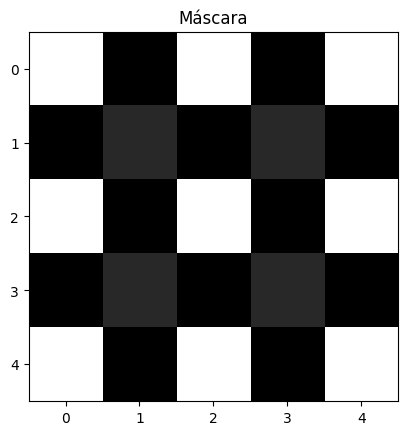

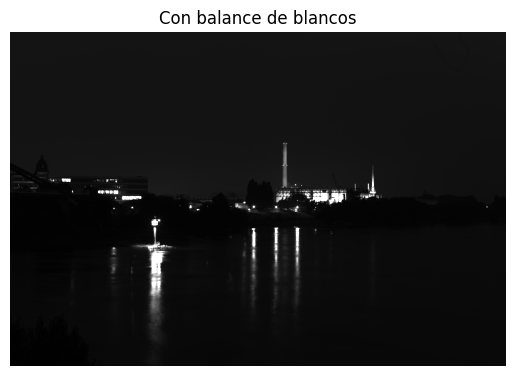

In [82]:
# Step 2: White balancing
mask = wbscalematrix(linear_bayer.shape[0], linear_bayer.shape[1], wb_multipliers, 'rggb')

plt.imshow(mask[0:5,0:5], cmap='gray')
plt.title("Máscara")
plt.show()

balanced_bayer = np.multiply(linear_bayer, mask)
show_img(balanced_bayer*255, "Con balance de blancos")

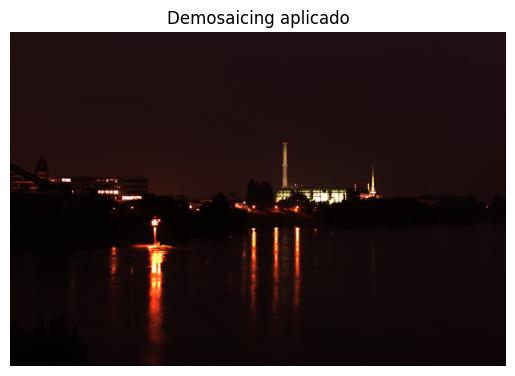

In [81]:
# Step 3: demosaicing
lin_rgb = np.clip(debayering(balanced_bayer), 0.0, 1.0)
show_img(lin_rgb, "Demosaicing aplicado")

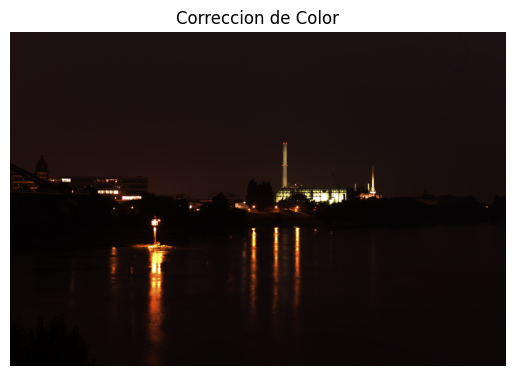

In [70]:
# Step 4: Color space conversion

# Convert to sRGB.
rgb2xyz = np.array([[0.4124564, 0.3575761, 0.1804375],
          [0.2126729, 0.7151522, 0.0721750],
          [0.0193339, 0.1191920, 0.9503041]])
xyz2cam = np.array([[0.6653, -0.1486, -0.0611],
          [-0.4221, 1.3303, 0.0929],
          [-0.0881, 0.2416, 0.7226]])

rgb2cam = xyz2cam * rgb2xyz

denom = np.tile(np.reshape(np.sum(rgb2cam,axis=1),(3,-1)), (1,3))
rgb2cam = np.divide(rgb2cam, denom) # Normalize rows to 1
cam2rgb = np.linalg.inv(rgb2cam)
lin_srgb = apply_cmatrix(lin_rgb, cam2rgb)
lin_srgb=np.clip(lin_srgb, 0, 1)

show_img(lin_srgb, "Correccion de Color")

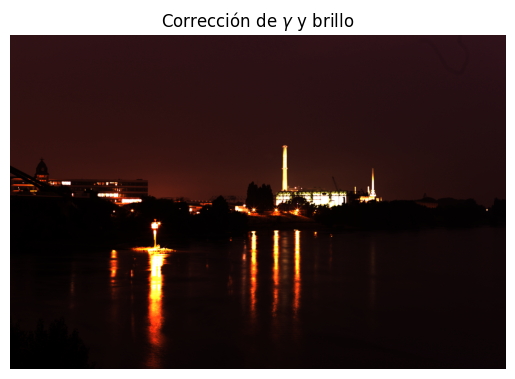

In [79]:
# Step 5: Brightness and gamma correction
bright_srgb = lin_srgb * 3
nl_srgb = bright_srgb ** 1.6

plt.imshow(nl_srgb)
plt.title("Corrección de $\gamma$ y brillo")
plt.axis('off')
plt.show()

### Explicacion

Como puede verse en el diagrama de abajo el proceso consta de 5 etapas posteriores a la carga de la imagen en formato RAW. Dichas etapas son:

1.   **Linealización**: Se normaliza la imagen para poder trabajarla.
2.   **Balance de blancos**: se aplica un multiplicador a todas las celdas de cada uno de los tres colores para compensar la percepción visual de cada uno de los tres colores.
3.  **Demosaicing**: Mediante interpolaciones lineales se recuperan los 3 canales de la imagen original.
4.  **Corrección de color**: Se aplicó la transformación de RGB a sRGB para mejorar la calidad de la imagen.
5.  **Corrección de Brillo y contraste**: De forma perceptual, se ajustó un multiplicador de brillo y $γ$ para mejorar la imagen.



El código de ejemplo pueden verse comentarios explicando más detalles de cada etapa de la misma.

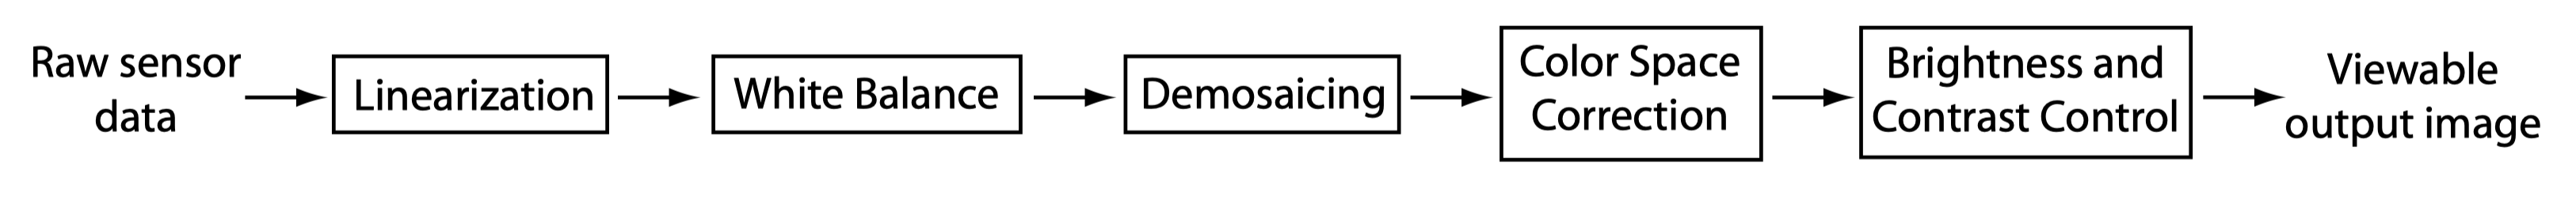